 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [111]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale = pd.read_csv(whale_returns_csv)

In [112]:
# Count nulls
# YOUR CODE HERE
whale.isnull().sum().sum()

4

In [113]:
# Drop nulls
# YOUR CODE HERE
whale.dropna()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [101]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
data1 = pd.read_csv(algo_returns_csv)

In [102]:
# Count nulls
# YOUR CODE HERE
data1.isnull().sum().sum()

6

In [103]:
# Drop nulls
# YOUR CODE HERE
data1.dropna()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [96]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
data2 = pd.read_csv(sp500_history_csv)

In [97]:
# Check Data Types
# YOUR CODE HERE
data2.dtypes

Date     object
Close    object
dtype: object

In [98]:
# Fix Data Types
# YOUR CODE HERE
def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)


df = data2['Close'].apply(convert_currency)
df

0       2933.68
1       2907.97
2       2905.03
3       2900.45
4       2907.06
         ...   
1644    1460.93
1645    1461.40
1646    1450.99
1647    1445.75
1648    1444.49
Name: Close, Length: 1649, dtype: float64

In [99]:
# Calculate Daily Returns
# YOUR CODE HERE

df.pct_change()

0            NaN
1      -0.008764
2      -0.001011
3      -0.001577
4       0.002279
          ...   
1644    0.003469
1645    0.000322
1646   -0.007123
1647   -0.003611
1648   -0.000872
Name: Close, Length: 1649, dtype: float64

In [100]:
# Drop nulls
# YOUR CODE HERE
data2.dropna()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [13]:
# Rename Column
# YOUR CODE HERE


## Combine Whale, Algorithmic, and S&P 500 Returns

In [114]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
df1 = pd.concat([whale, data1, data2], sort=False)
df1

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
0,2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,NaN,NaN,NaN
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213,NaN,NaN,NaN
3,2015-03-05,0.004016,0.004076,0.002355,0.006726,NaN,NaN,NaN
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1644,5-Oct-12,NaN,NaN,NaN,NaN,NaN,NaN,$1460.93
1645,4-Oct-12,NaN,NaN,NaN,NaN,NaN,NaN,$1461.40
1646,3-Oct-12,NaN,NaN,NaN,NaN,NaN,NaN,$1450.99
1647,2-Oct-12,NaN,NaN,NaN,NaN,NaN,NaN,$1445.75


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

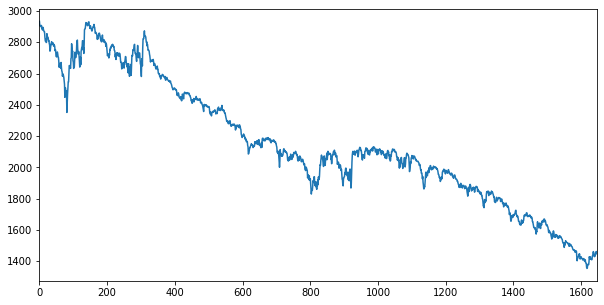

In [117]:
# Plot daily returns
# YOUR CODE HERE
df.plot(figsize=(10,5))

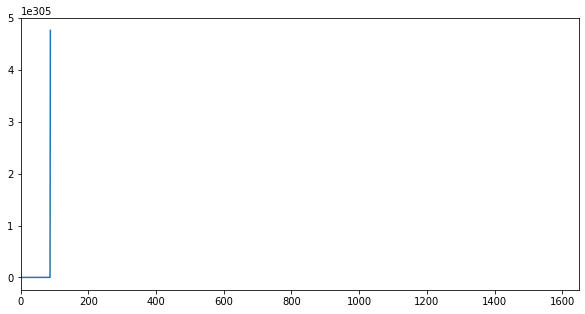

In [121]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + df).cumprod()-1
cumulative_returns.plot(figsize=(10,5))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [17]:
# Box plot to visually show risk
# YOUR CODE HERE

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

In [19]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

In [20]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

In [21]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE


In [22]:
# Correlation
# YOUR CODE HERE

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [24]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [25]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [26]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
# YOUR CODE HERE

In [28]:
# Read the second stock
# YOUR CODE HERE

In [29]:
# Read the third stock
# YOUR CODE HERE

In [30]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [31]:
# Reset the index
# YOUR CODE HERE

In [33]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# YOUR CODE HERE

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [37]:
# Risk
# YOUR CODE HERE

In [38]:
# Rolling
# YOUR CODE HERE

In [39]:
# Beta
# YOUR CODE HERE

In [40]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [42]:
# YOUR CODE HERE